In [3]:
import pandas as pd
import numpy as np
import warnings

import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

from faker import Faker
from random import randint, choice, uniform
from datetime import datetime, timedelta

Files in 'C:\\Users\\msi\\PycharmProjects\\pythonProject': ['.idea', '.ipynb_checkpoints', '.venv', 'achats.csv', 'clients.csv', 'conceptual model.py', 'Erreurs', 'Real DB.py', 'Untitled.ipynb', '__pycache__']


In [4]:
df = pd.read_csv('clients.csv')
df = pd.read_csv('achats.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4024 non-null   object
 1   plan           4024 non-null   object
 2   quantity       4024 non-null   int64 
 3   purchase_date  4024 non-null   object
 4   total_spent    4024 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 157.3+ KB


In [6]:
df.head()

,customer_id,plan,quantity,purchase_date,total_spent
0,CTL001,Blue go s,1,2022-12-09,2000
1,CTL001,Blue go plus S,2,2022-05-07,30000
2,CTL001,Blue one xl,1,2022-06-22,10000
3,CTL001,Blue home s,1,2022-09-22,15000
4,CTL001,Blue go plus m,2,2022-11-30,50000


In [7]:
df["purchase_date"].max() # Last invoice date



'2022-12-30'

In [8]:
from datetime import datetime
today_date = datetime(2022,12,31) # last invoice date is assigned to today_date variable


In [10]:
df["purchase_date"] = pd.to_datetime(df["purchase_date"])


In [11]:
# Grouping the last invoice dates according to the Customer ID variable, subtracting them from today_date, and assigning them as recency
recency = (today_date - df.groupby("customer_id").agg({"purchase_date":"max"}))
# Rename column name as Recency
recency.rename(columns = {"purchase_date":"Recency"}, inplace = True)
# Change the values to day format
recency_df = recency["Recency"].apply(lambda x: x.days)
recency_df.head()

customer_id
CTL001    20
CTL002    78
CTL003    59
CTL004     4
CTL005     5
Name: Recency, dtype: int64

In [12]:
# Lire les données du fichier CSV contenant les achats
import pandas as pd
df = pd.read_csv('achats.csv')

# Grouping unique values of purchase date according to customer_id variable and assigning them to freq_df variable
freq_df = df.groupby("customer_id").agg({"purchase_date": "nunique"})

# Renommer la colonne pour indiquer qu'elle représente la fréquence
freq_df.rename(columns={"purchase_date": "Frequency"}, inplace=True)

# Afficher les premières lignes de freq_df
print(freq_df.head())

             Frequency
customer_id           
CTL001              13
CTL002               8
CTL003              13
CTL004               9
CTL005               9


In [16]:
import pandas as pd

# Lire les données du fichier CSV contenant les achats
df = pd.read_csv('achats.csv')

# Calculer le montant total dépensé par chaque client sur l'année
total_spent_df = df.groupby("customer_id").agg({"total_spent": "sum"})

# Renommer la colonne pour indiquer qu'elle représente le montant total dépensé
total_spent_df.rename(columns={"total_spent": "Monetary"}, inplace=True)

# Afficher les premières lignes du DataFrame avec le montant total dépensé par client
print(total_spent_df.head())


             Monetary
customer_id          
CTL001         347000
CTL002         170000
CTL003         461000
CTL004         391000
CTL005         256000


In [1]:
# Concaténation des résultats dans un seul DataFrame
rfm_df = pd.concat([recency_df, freq_df['Frequency'], total_spent_df['Monetary']], axis=1)

# Afficher les premières lignes du DataFrame final
print(rfm_df.head(10))

NameError: name 'pd' is not defined

In [21]:
import pandas as pd

# Supposons que rfm_df est déjà défini après la concaténation

# Créer le score de récence
rfm_df["RecencyScore"] = pd.qcut(rfm_df["Recency"], 5, labels=[5, 4, 3, 2, 1])

# Créer le score de fréquence
rfm_df["FrequencyScore"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Créer le score monétaire
rfm_df["MonetaryScore"] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Afficher les premières lignes pour vérifier les scores
print(rfm_df.head())


             Recency  Frequency  Monetary RecencyScore FrequencyScore  \
customer_id                                                             
CTL001            20         13    347000            3              4   
CTL002            78          8    170000            1              2   
CTL003            59         13    461000            1              4   
CTL004             4          9    391000            5              2   
CTL005             5          9    256000            5              2   

            MonetaryScore  
customer_id                
CTL001                  4  
CTL002                  1  
CTL003                  5  
CTL004                  5  
CTL005                  3  


In [36]:
# Combining Recency, Frequency, and Monetary Scores in a string format
import pandas as pd

rfm_df["RFM_SCORE"] = (rfm_df['RecencyScore'].astype(str) + 
                    rfm_df['FrequencyScore'].astype(str) + 
                    rfm_df['MonetaryScore'].astype(str))

In [37]:
# Customers with best scores
rfm_df[rfm_df["RFM_SCORE"]=="111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_SCORE
customer_id,,,,,,,,
CTL011,66,6,145000,1,1,1,111,111
CTL017,112,6,129000,1,1,1,111,111
CTL036,67,5,85000,1,1,1,111,111
CTL061,66,5,122000,1,1,1,111,111
CTL064,61,5,124000,1,1,1,111,111


In [38]:
# Mapping of segments according to recency and frequency scores of customers
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

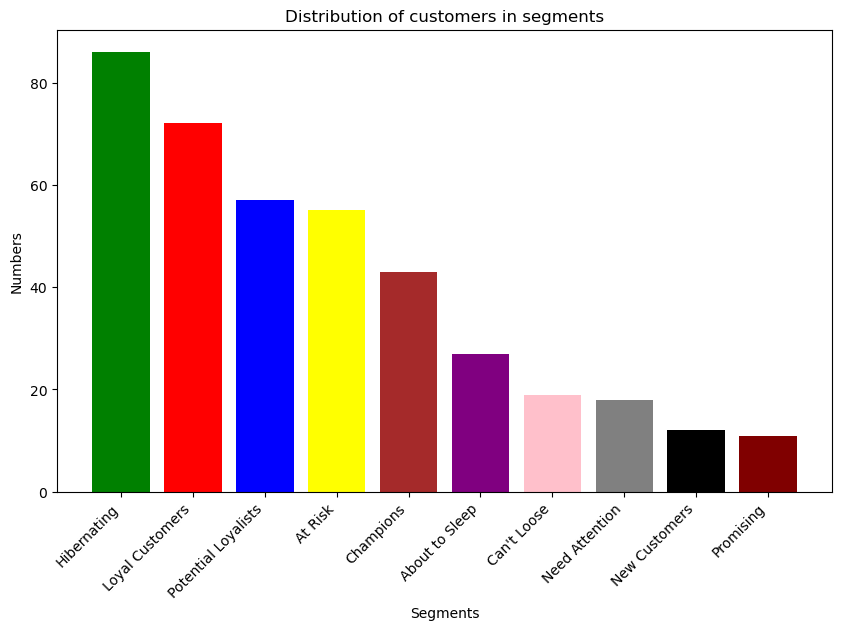

In [3]:
import matplotlib.pyplot as plt

# Données
segments = ['Hibernating', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Champions', 'About to Sleep', 'Can\'t Loose', 'Need Attention', 'New Customers', 'Promising']
counts = [86, 72, 57, 55, 43, 27, 19, 18, 12, 11]

# Couleurs spécifiques pour chaque segment
colors = ['green', 'red', 'blue', 'yellow', 'brown', 'purple', 'pink', 'grey', 'black', 'maroon']

# Création du bar plot
plt.figure(figsize=(10, 6))
plt.bar(segments, counts, color=colors)

# Ajout des labels et du titre
plt.xlabel('Segments')
plt.ylabel('Numbers')
plt.title('Distribution of customers in segments')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.show()


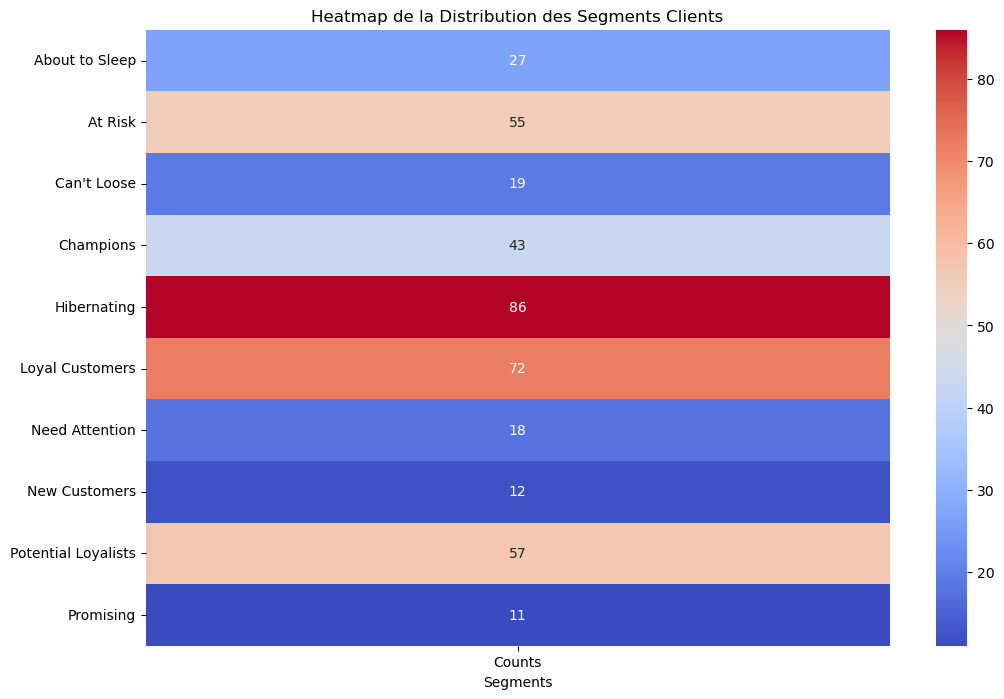

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données
segments = ['Hibernating', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Champions', 'About to Sleep', 
            'Can\'t Loose', 'Need Attention', 'New Customers', 'Promising']
counts = [86, 72, 57, 55, 43, 27, 19, 18, 12, 11]

# Création d'un DataFrame pour faciliter la visualisation
data = pd.DataFrame({'Segments': segments, 'Counts': counts})

# Reshape the data to have a single row with segment counts, this makes it usable for a heatmap
heatmap_data = data.pivot_table(index='Segments', values='Counts')

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)

# Titre et labels
plt.title('Heatmap de la Distribution des Segments Clients')
plt.xlabel('Segments')
plt.ylabel('')

# Affichage du graphique
plt.show()


In [39]:
# Recency and Frequency scores are turned into string format, combined and assigned to Segment
rfm_df['Segment'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
# Segments are changed with the definitons of seg_map
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)

In [40]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_SCORE,Segment
customer_id,,,,,,,,,
CTL001,20,13,347000,3,4,4,344,344,Loyal Customers
CTL002,78,8,170000,1,2,1,121,121,Hibernating
CTL003,59,13,461000,1,4,5,145,145,At Risk
CTL004,4,9,391000,5,2,5,525,525,Potential Loyalists
CTL005,5,9,256000,5,2,3,523,523,Potential Loyalists


In [41]:
# Mean, median, count statistics of different segments
rfm_df[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency               Frequency               \
                          mean median count       mean median count   
Segment                                                               
About to Sleep       25.111111   25.0    27   7.259259    8.0    27   
At Risk              60.200000   48.0    55  10.781818   11.0    55   
Can't Loose          54.263158   53.0    19  14.473684   15.0    19   
Champions             4.302326    4.0    43  13.139535   13.0    43   
Hibernating          77.174419   66.5    86   6.534884    6.0    86   
Loyal Customers      18.083333   18.0    72  13.166667   13.0    72   
Need Attention       24.888889   24.5    18   9.888889   10.0    18   
New Customers         5.000000    4.5    12   5.666667    5.5    12   
Potential Loyalists   7.456140    7.0    57   9.192982    9.0    57   
Promising            14.545455   15.0    11   5.909091    6.0    11   

                          Monetary                  
                              mean    median count  
Segment                                             
About to Sleep       185296.296296  177000.0    27  
At Risk              297909.090909  302000.0    55  
Can't Loose          410105.263158  398000.0    19  
Champions            359720.930233  357000.0    43  
Hibernating          178732.558140  173000.0    86  
Loyal Customers      365152.777778  361000.0    72  
Need Attention       287166.666667  292000.0    18  
New Customers        180833.333333  184000.0    12  
Potential Loyalists  241157.894737  236000.0    57  
Promising            162909.090909  150000.0    11

In [42]:
rfm_segment_stats = rfm_df[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])
rfm_segment_stats.to_csv('rfm_segment_stats.csv')


In [43]:
pd.options.display.float_format = '{:.2f}'.format  # Pour formater les nombres avec deux décimales
print(rfm_segment_stats)


                    Recency              Frequency               Monetary  \
                       mean median count      mean median count      mean   
Segment                                                                     
About to Sleep        25.11  25.00    27      7.26   8.00    27 185296.30   
At Risk               60.20  48.00    55     10.78  11.00    55 297909.09   
Can't Loose           54.26  53.00    19     14.47  15.00    19 410105.26   
Champions              4.30   4.00    43     13.14  13.00    43 359720.93   
Hibernating           77.17  66.50    86      6.53   6.00    86 178732.56   
Loyal Customers       18.08  18.00    72     13.17  13.00    72 365152.78   
Need Attention        24.89  24.50    18      9.89  10.00    18 287166.67   
New Customers          5.00   4.50    12      5.67   5.50    12 180833.33   
Potential Loyalists    7.46   7.00    57      9.19   9.00    57 241157.89   
Promising             14.55  15.00    11      5.91   6.00    11 162909.09   

In [10]:
rfm_segment_stats = rfm_df[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean", "median", "count", "std", "min", "max"])
print(rfm_segment_stats)


KeyError: "None of [Index(['Segment', 'Recency', 'Frequency', 'Monetary'], dtype='object')] are in the [columns]"

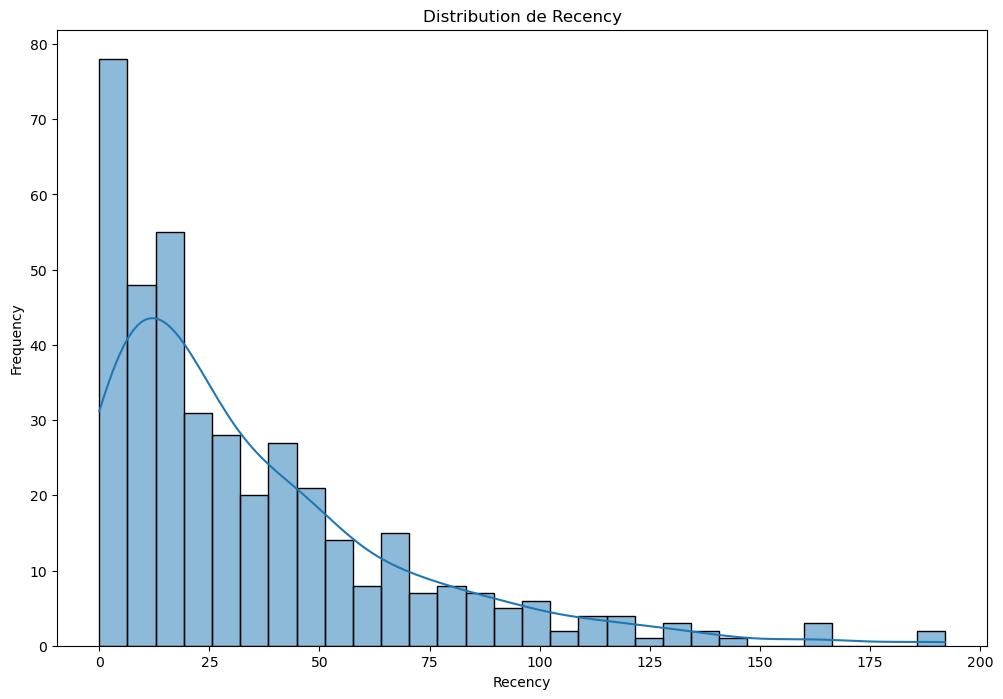

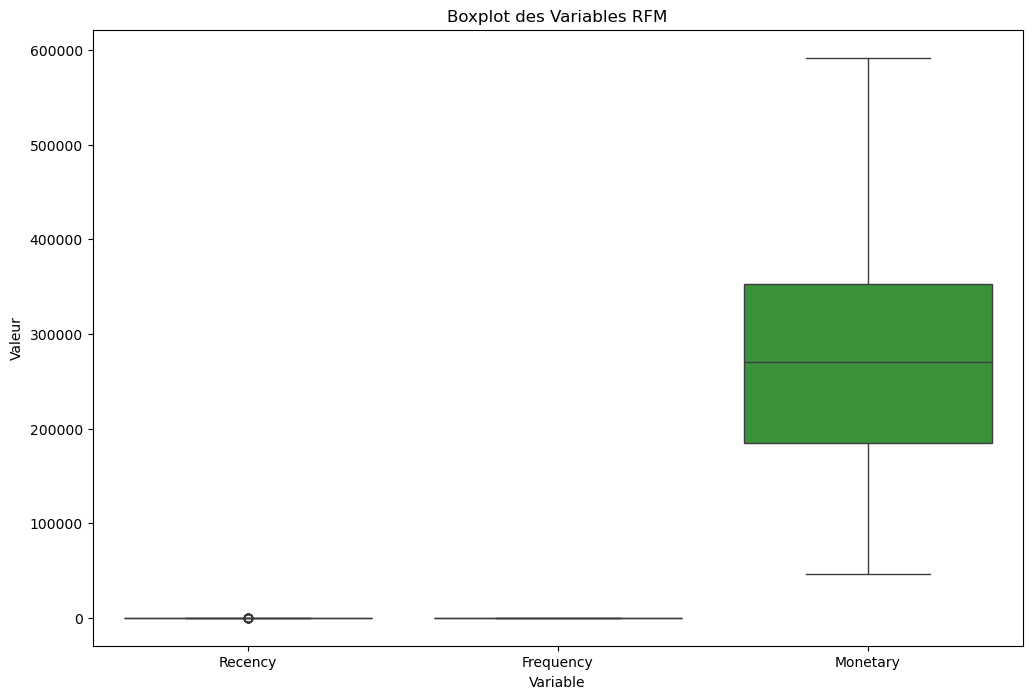

In [93]:
# Distribution de Recency
plt.figure(figsize=(12, 8))
sns.histplot(rfm_df['Recency'], bins=30, kde=True)
plt.title('Distribution de Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Boxplot pour visualiser les statistiques descriptives
plt.figure(figsize=(12, 8))
sns.boxplot(data=rfm_df[['Recency', 'Frequency', 'Monetary']])
plt.title('Boxplot des Variables RFM')
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.show()


In [45]:
segment_distribution = rfm_df["Segment"].value_counts()
print(segment_distribution)


Segment
Hibernating            86
Loyal Customers        72
Potential Loyalists    57
At Risk                55
Champions              43
About to Sleep         27
Can't Loose            19
Need Attention         18
New Customers          12
Promising              11
Name: count, dtype: int64


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Variables indépendantes et dépendantes
X = rfm_df[["Recency", "Frequency", "Monetary"]]
y = rfm_df["Monetary"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
print("Score R^2:", model.score(X_test, y_test))






NameError: name 'rfm_df' is not defined

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Définir un seuil monétaire (par exemple, médiane des dépenses)
seuil_monetaire = rfm_df["Monetary"].median()

# Créer une variable binaire "Churn" en fonction du seuil
rfm_df['Churn'] = (rfm_df['Monetary'] < seuil_monetaire).astype(int)

# Variables indépendantes et dépendante
X = rfm_df[["Recency", "Frequency", "Monetary"]]
y = rfm_df["Churn"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Faire des prédictions
y_pred = log_model.predict(X_test)

# Évaluer le modèle
print("Score de précision:", log_model.score(X_test, y_test))



KeyError: 'Monetary'

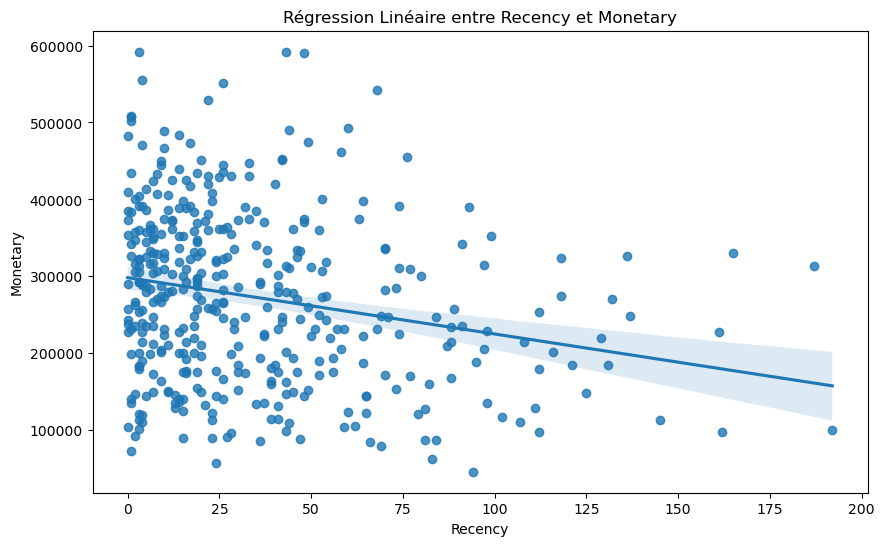

In [99]:
# Régression Linéaire
plt.figure(figsize=(10, 6))
sns.regplot(x='Recency', y='Monetary', data=rfm_df)
plt.title('Régression Linéaire entre Recency et Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


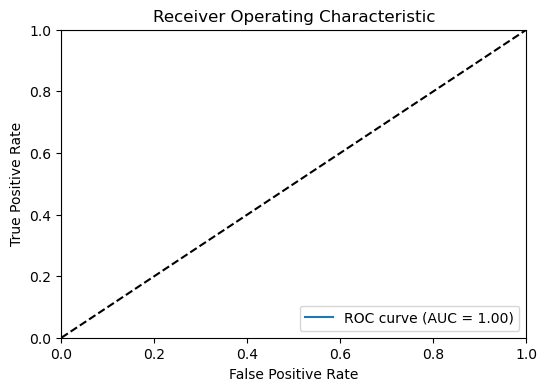

In [121]:
from sklearn.metrics import roc_curve, auc

# Probabilités de prédiction
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Visualiser la courbe ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [57]:
print(merged_df.columns)


Index(['customer_id', 'plan', 'quantity', 'purchase_date', 'total_spent',
       'age', 'gender_Female', 'gender_Male', 'region_Centre',
       'region_Littoral', 'region_Nord', 'region_Nord-Ouest', 'region_Ouest'],
      dtype='object')


In [58]:
# Charger les données des achats
achats_df = pd.read_csv('achats.csv')
print("Colonnes dans achats.csv :")
print(achats_df.columns)

# Charger les données des clients
clients_df = pd.read_csv('clients.csv')
print("Colonnes dans clients.csv :")
print(clients_df.columns)

Colonnes dans achats.csv :
Index(['customer_id', 'plan', 'quantity', 'purchase_date', 'total_spent'], dtype='object')
Colonnes dans clients.csv :
Index(['customer_id', 'age', 'gender', 'region'], dtype='object')


In [59]:
# Fusionner les données sur la colonne 'customer_id'
merged_df = pd.merge(achats_df, clients_df, on='customer_id')

# Vérifier les colonnes après fusion
print("Colonnes dans merged_df :")
print(merged_df.columns)


Colonnes dans merged_df :
Index(['customer_id', 'plan', 'quantity', 'purchase_date', 'total_spent',
       'age', 'gender', 'region'],
      dtype='object')


In [61]:
import pandas as pd

# Charger les données des achats
achats_df = pd.read_csv('achats.csv')


# Convertir la colonne 'purchase_date' en datetime
achats_df['purchase_date'] = pd.to_datetime(achats_df['purchase_date'])

# Définir la date de référence pour la récence
today_date = pd.to_datetime('2022-12-30')

# Calculer Récence, Fréquence, et Monétaire
rfm_df = achats_df.groupby('customer_id').agg({
    'purchase_date': lambda x: (today_date - x.max()).days,  # Récence
    'quantity': 'sum',                                      # Fréquence
    'total_spent': 'sum'                                    # Monétaire
}).reset_index()

# Renommer les colonnes pour RFM
rfm_df.rename(columns={'purchase_date': 'Recency', 'quantity': 'Frequency', 'total_spent': 'Monetary'}, inplace=True)


# Charger les données des clients
clients_df = pd.read_csv('clients.csv')

# Fusionner les données RFM avec les données démographiques
merged_df = pd.merge(rfm_df, clients_df, on='customer_id')

# Convertir les variables catégorielles en variables numériques
merged_df = pd.get_dummies(merged_df, columns=['gender', 'region'])


# Calculer la matrice de corrélation
correlation_columns = ["Recency", "Frequency", "Monetary"] + list(merged_df.filter(like='gender_').columns) + list(merged_df.filter(like='region_').columns)
correlation_matrix = merged_df[correlation_columns].corr()

# Afficher la matrice de corrélation
print(correlation_matrix)



                   Recency  Frequency  Monetary  gender_Female  gender_Male  \
Recency               1.00      -0.33     -0.23           0.02        -0.02   
Frequency            -0.33       1.00      0.82           0.00        -0.00   
Monetary             -0.23       0.82      1.00           0.01        -0.01   
gender_Female         0.02       0.00      0.01           1.00        -1.00   
gender_Male          -0.02      -0.00     -0.01          -1.00         1.00   
region_Centre         0.02      -0.12     -0.11           0.06        -0.06   
region_Littoral       0.01       0.01      0.00           0.02        -0.02   
region_Nord          -0.07       0.13      0.13          -0.03         0.03   
region_Nord-Ouest     0.01      -0.02     -0.07          -0.09         0.09   
region_Ouest          0.02       0.01      0.05           0.04        -0.04   

                   region_Centre  region_Littoral  region_Nord  \
Recency                     0.02             0.01        -0.07  

In [63]:
import pandas as pd

# Assurez-vous que rfm_df contient les colonnes nécessaires avant d'enregistrer
rfm_df.to_csv('rfm.csv', index=False)


# Charger les données des clients
clients_df = pd.read_csv('clients.csv')
# Charger les données RFM
rfm_df = pd.read_csv('rfm.csv')

# Fusionner les deux DataFrames sur 'customer_id'
merged_df = pd.merge(rfm_df, clients_df, on='customer_id')

# Vérifier les colonnes disponibles
print(merged_df.columns)



#Anova entre différentes régions
from scipy import stats

# Préparer les données pour ANOVA
regions = merged_df['region'].unique()
recency_groups = [merged_df[merged_df['region'] == region]['Recency'] for region in regions]
frequency_groups = [merged_df[merged_df['region'] == region]['Frequency'] for region in regions]
monetary_groups = [merged_df[merged_df['region'] == region]['Monetary'] for region in regions]

# Effectuer ANOVA
recency_anova = stats.f_oneway(*recency_groups)
frequency_anova = stats.f_oneway(*frequency_groups)
monetary_anova = stats.f_oneway(*monetary_groups)

print("ANOVA pour Recency entre régions : F =", recency_anova.statistic, ", p-value =", recency_anova.pvalue)
print("ANOVA pour Frequency entre régions : F =", frequency_anova.statistic, ", p-value =", frequency_anova.pvalue)
print("ANOVA pour Monetary entre régions : F =", monetary_anova.statistic, ", p-value =", monetary_anova.pvalue)


#Anova entre différents genres
# Préparer les données pour ANOVA
genders = merged_df['gender'].unique()
recency_gender_groups = [merged_df[merged_df['gender'] == gender]['Recency'] for gender in genders]
frequency_gender_groups = [merged_df[merged_df['gender'] == gender]['Frequency'] for gender in genders]
monetary_gender_groups = [merged_df[merged_df['gender'] == gender]['Monetary'] for gender in genders]

# Effectuer ANOVA
recency_gender_anova = stats.f_oneway(*recency_gender_groups)
frequency_gender_anova = stats.f_oneway(*frequency_gender_groups)
monetary_gender_anova = stats.f_oneway(*monetary_gender_groups)

print("ANOVA pour Recency entre genres : F =", recency_gender_anova.statistic, ", p-value =", recency_gender_anova.pvalue)
print("ANOVA pour Frequency entre genres : F =", frequency_gender_anova.statistic, ", p-value =", frequency_gender_anova.pvalue)
print("ANOVA pour Monetary entre genres : F =", monetary_gender_anova.statistic, ", p-value =", monetary_gender_anova.pvalue)


Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'age', 'gender',
       'region'],
      dtype='object')
ANOVA pour Recency entre régions : F = 0.4788189895855515 , p-value = 0.7513013761336503
ANOVA pour Frequency entre régions : F = 2.3778130122683505 , p-value = 0.05136931202015308
ANOVA pour Monetary entre régions : F = 3.108762398784791 , p-value = 0.015424540215169862
ANOVA pour Recency entre genres : F = 0.2061981627274558 , p-value = 0.6500112316570068
ANOVA pour Frequency entre genres : F = 0.00042585320744629345 , p-value = 0.9835461958269336
ANOVA pour Monetary entre genres : F = 0.025246627184420025 , p-value = 0.8738346585799197


In [134]:
from datetime import datetime

# Date de référence
reference_date = datetime(2022, 12, 31)

# Calcul de la durée depuis le dernier achat
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
last_purchase_date = df.groupby('customer_id')['purchase_date'].max()
last_purchase_date = last_purchase_date.reset_index()
last_purchase_date['days_since_last_purchase'] = (reference_date - last_purchase_date['purchase_date']).dt.days

# Définir un seuil de durée sans achat (par exemple, 60 jours)
threshold_days = 60
last_purchase_date['at_risk_due_to_duration'] = last_purchase_date['days_since_last_purchase'] > threshold_days



# Calcul des dépenses totales et moyennes par client
customer_spending = df.groupby('customer_id').agg({'total_spent': ['sum', 'mean']})
customer_spending.columns = ['total_spent', 'avg_spent']

# Joindre les dépenses moyennes avec la date du dernier achat
last_purchase_date = last_purchase_date.merge(customer_spending, on='customer_id')

# Calcul des dépenses récentes
recent_purchases = df[df['purchase_date'] > (reference_date - pd.DateOffset(days=30))]
recent_spending = recent_purchases.groupby('customer_id')['total_spent'].sum()
recent_spending = recent_spending.reset_index()
recent_spending.columns = ['customer_id', 'recent_spent']

# Joindre les dépenses récentes
last_purchase_date = last_purchase_date.merge(recent_spending, on='customer_id', how='left')
last_purchase_date['recent_spent'].fillna(0, inplace=True)

# Définir un seuil pour les dépenses inférieures (par exemple, 50% de la dépense moyenne)
spending_threshold = 0.5 * last_purchase_date['avg_spent']
last_purchase_date['at_risk_due_to_spending'] = last_purchase_date['recent_spent'] < spending_threshold


# Identifier les clients à risque selon les deux critères
last_purchase_date['at_risk'] = last_purchase_date['at_risk_due_to_duration'] | last_purchase_date['at_risk_due_to_spending']

# Compter les clients à risque
num_at_risk = last_purchase_date['at_risk'].sum()
total_customers = len(last_purchase_date)
risk_rate = (num_at_risk / total_customers) * 100

print(f"Taux de clients à risque de churn : {risk_rate:.2f}%")



Taux de clients à risque de churn : 55.75%


C:\Users\msi\AppData\Local\Temp\ipykernel_2760\2879877834.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  last_purchase_date['recent_spent'].fillna(0, inplace=True)


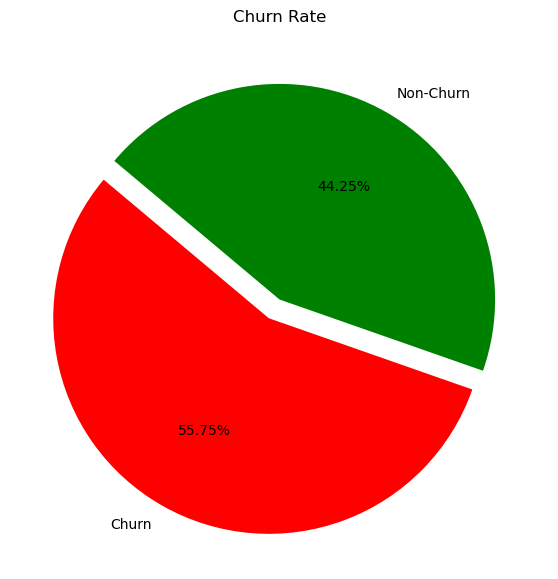

In [139]:
import matplotlib.pyplot as plt

# Taux de Churn (en pourcentage)
churn_rate = 55.75  # Exemple de taux de churn en pourcentage
non_churn_rate = 100 - churn_rate

# Définir les labels et les tailles pour le graphique en secteurs
labels = ['Churn', 'Non-Churn']
sizes = [churn_rate, non_churn_rate]
colors = ['red', 'green']
explode = (0.1, 0)  # Exposer légèrement le secteur de Churn

# Créer le graphique en secteurs
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Churn Rate')
plt.show()


In [162]:
import pandas as pd
import datetime as dt

# Charger les données
achats = pd.read_csv('achats.csv')

# Convertir la colonne 'purchase_date' en format datetime
achats['purchase_date'] = pd.to_datetime(achats['purchase_date'])

# Calculer la récence (date de la dernière transaction pour chaque service)
last_date = df['purchase_date'].max()
rfm_plan = df.groupby('plan').agg({
    'purchase_date': lambda x: (last_date - x.max()).days,
    'customer_id': 'count',
    'total_spent': 'sum'
}).reset_index()

rfm_plan.columns = ['plan', 'Recency', 'Frequency', 'Monetary']

# Inverser la récence pour que les valeurs les plus récentes aient le score le plus élevé
rfm_plan['Recency'] = rfm_plan['Recency'].rank(ascending=False)
rfm_plan['Frequency'] = rfm_plan['Frequency'].rank(ascending=True)
rfm_plan['Monetary'] = rfm_plan['Monetary'].rank(ascending=True)

# Créer des segments en fonction des scores RFM
# Créer le score de récence
rfm_plan["RecencyScore"] = pd.cut(rfm_plan["Recency"], 5, labels=[5, 4, 3, 2, 1])

# Créer le score de fréquence
rfm_plan["FrequencyScore"] = pd.cut(rfm_plan["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Créer le score monétaire
rfm_plan["MonetaryScore"] = pd.cut(rfm_plan['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm_plan["RFM_SCORE"] = (rfm_plan['RecencyScore'].astype(str) + 
                    rfm_plan['FrequencyScore'].astype(str) + 
                    rfm_plan['MonetaryScore'].astype(str))

print(rfm_plan.head())




             plan  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0       Blue go l     2.50       2.00      6.00            5              1   
1       Blue go m    13.00      12.50      4.00            1              4   
2  Blue go plus S     7.00      12.50      9.00            3              4   
3  Blue go plus l    13.00       7.50     16.00            1              2   
4  Blue go plus m     2.50      17.00     13.00            5              5   

  MonetaryScore RFM_SCORE  
0             2       512  
1             1       141  
2             3       343  
3             5       125  
4             4       554  


In [171]:
# Segmenter les services (exemple simplifié)
def segment_plan(row):
    if row['RFM_SCORE'] >= '433':
        return 'Best Plans'
    elif row['RFM_SCORE'] >= '322':
        return 'Better PLans'
    elif row['RFM_SCORE'] >= '211':
        return 'Potential PLans'
    else:
        return 'At Risk'

rfm_plan['Segment'] = rfm_plan.apply(segment_plan, axis=1)




In [176]:
rfm_plan[rfm_plan["RFM_SCORE"]=="411"].head()

,plan,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment


In [178]:
# Afficher les services les plus et les moins consommés
plan_most_consumed = rfm_plan.sort_values('RFM_SCORE', ascending=False)
plan_least_consumed = rfm_plan.sort_values('RFM_SCORE', ascending=True)


# Afficher les premières lignes pour vérifier les scores
print("Services les plus consommés :")
print(plan_most_consumed.head())

print("\nServices les moins consommés :")
print(plan_least_consumed.head())

Services les plus consommés :
              plan  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
4   Blue go plus m     2.50      17.00     13.00            5              5   
6       Blue go xl     1.00      15.00     11.00            5              5   
0        Blue go l     2.50       2.00      6.00            5              1   
7      Blue go xxl     4.50      10.00     15.00            4              3   
10     Blue home s     4.50       1.00      8.00            4              1   

   MonetaryScore RFM_SCORE       Segment  
4              4       554    Best Plans  
6              4       554    Best Plans  
0              2       512    Best Plans  
7              5       435    Best Plans  
10             3       413  Better PLans  

Services les moins consommés :
              plan  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
13      Blue one s    13.00       4.00      1.00            1              1   
15      Blue sky l    13.00       4.00 

In [186]:
rfm_segment_stats = rfm_plan[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean", "median", "count", "std", "min", "max"])
print(rfm_segment_stats)

             Recency                               Frequency               \
                mean median count  std   min   max      mean median count   
Segment                                                                     
At Risk        13.00  13.00     9 0.00 13.00 13.00      8.22   7.50     9   
Best Plans      2.62   2.50     4 1.44  1.00  4.50     11.00  12.50     4   
Better PLans    6.38   7.00     4 1.25  4.50  7.00      8.75  10.00     4   

                             Monetary                               
              std  min   max     mean median count  std  min   max  
Segment                                                             
At Risk      4.27 4.00 16.00     9.11  10.00     9 6.01 1.00 17.00  
Best Plans   6.68 2.00 17.00    11.25  12.00     4 3.86 6.00 15.00  
Better PLans 5.87 1.00 14.00     6.50   7.50     4 3.11 2.00  9.00  


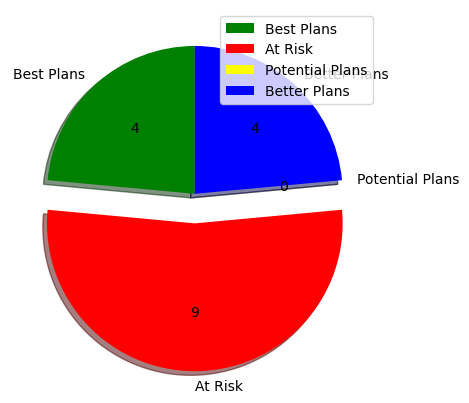

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Données
segments = ['Best Plans', 'At Risk', 'Potential Plans', 'Better Plans']
counts = [4, 9, 0, 4]
myexplode = [0, 0.2, 0, 0]
mycolors = ["green", "red", "yellow", "blue"]

# Création du pie chart avec les nombres affichés sur chaque morceau
plt.pie(counts, labels=segments, startangle=90, explode=myexplode, shadow=True, colors=mycolors,
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))

# Ajouter la légende
plt.legend()

# Afficher le graphique
plt.show()


In [3]:
import pandas as pd
from scipy import stats

# Charger les données des clients
clients_df = pd.read_csv('clients.csv')

# Charger les données RFM
rfm_df = pd.read_csv('rfm.csv')

# Vérifier que 'customer_id' existe dans les deux DataFrames
if 'customer_id' in rfm_df.columns and 'customer_id' in clients_df.columns:
    
    # Fusionner les deux DataFrames sur 'customer_id'
    merged_df = pd.merge(rfm_df, clients_df, on='customer_id')

    # Vérifier les colonnes disponibles après la fusion
    print(merged_df.columns)

    # Assurez-vous que 'age' existe dans le DataFrame fusionné
    if 'age' in merged_df.columns:
        
        # Préparer les données pour ANOVA
        ages = merged_df['age'].unique()  # Liste des âges uniques
        recency_age_groups = [merged_df[merged_df['age'] == age]['Recency'] for age in ages]
        frequency_age_groups = [merged_df[merged_df['age'] == age]['Frequency'] for age in ages]
        monetary_age_groups = [merged_df[merged_df['age'] == age]['Monetary'] for age in ages]

        # Effectuer ANOVA
        recency_age_anova = stats.f_oneway(*recency_age_groups)
        frequency_age_anova = stats.f_oneway(*frequency_age_groups)
        monetary_age_anova = stats.f_oneway(*monetary_age_groups)

        # Afficher les résultats de l'ANOVA
        print("ANOVA pour Recency entre âges : F =", recency_age_anova.statistic, ", p-value =", recency_age_anova.pvalue)
        print("ANOVA pour Frequency entre âges : F =", frequency_age_anova.statistic, ", p-value =", frequency_age_anova.pvalue)
        print("ANOVA pour Monetary entre âges : F =", monetary_age_anova.statistic, ", p-value =", monetary_age_anova.pvalue)
        
    else:
        print("La colonne 'age' est absente du DataFrame fusionné.")
else:
    print("Les colonnes 'customer_id' sont manquantes dans l'un des DataFrames.")


Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'age', 'gender',
       'region'],
      dtype='object')
ANOVA pour Recency entre âges : F = 0.8255325358398442 , p-value = 0.8115929595179965
ANOVA pour Frequency entre âges : F = 1.1424800177516612 , p-value = 0.2357841142275286
ANOVA pour Monetary entre âges : F = 1.080171131510106 , p-value = 0.3320413932155046


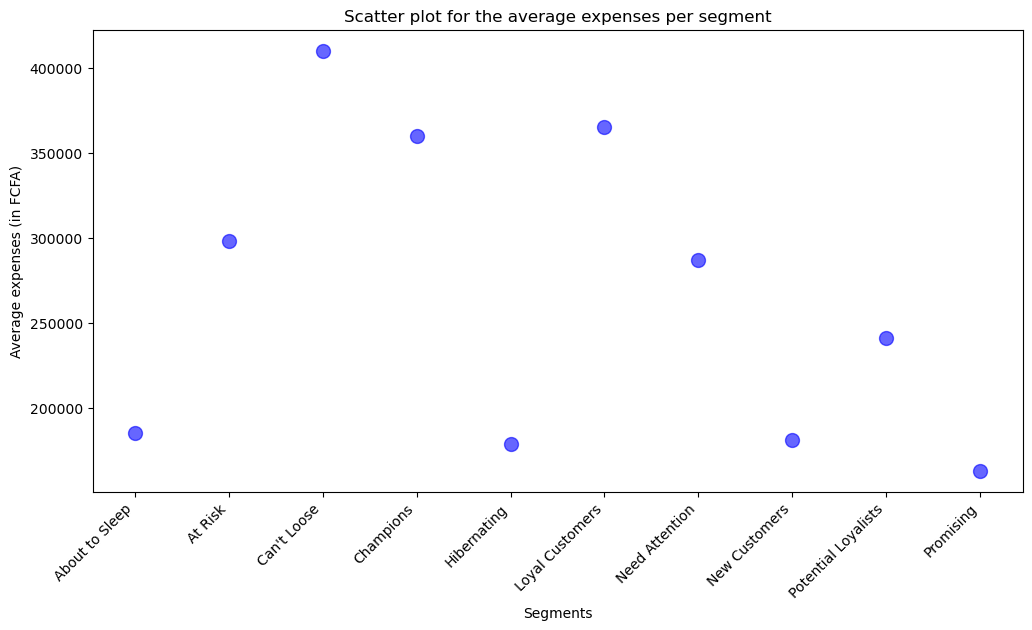

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Données réelles pour les segments et les dépenses moyennes
data = {
    'Segments': [
        'About to Sleep', 'At Risk', 'Can\'t Loose', 'Champions', 
        'Hibernating', 'Loyal Customers', 'Need Attention', 
        'New Customers', 'Potential Loyalists', 'Promising'
    ],
    'Dépenses Moyennes': [
        185296.30, 297909.09, 410105.26, 359720.93, 
        178732.56, 365152.78, 287166.67, 
        180833.33, 241157.89, 162909.09
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Création du scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Segments'], df['Dépenses Moyennes'], color='blue', alpha=0.6, s=100)

# Titre et labels
plt.title('Scatter plot for the average expenses per segment')
plt.xlabel('Segments')
plt.ylabel('Average expenses (in FCFA)')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage du scatter plot
plt.show()


In [5]:
import pandas as pd

# Charger les données des achats
achats_df = pd.read_csv('achats.csv')


# Convertir la colonne 'purchase_date' en datetime
achats_df['purchase_date'] = pd.to_datetime(achats_df['purchase_date'])

# Définir la date de référence pour la récence
today_date = pd.to_datetime('2022-12-30')

# Calculer Récence, Fréquence, et Monétaire
rfm_df = achats_df.groupby('customer_id').agg({
    'purchase_date': lambda x: (today_date - x.max()).days,  # Récence
    'quantity': 'sum',                                      # Fréquence
    'total_spent': 'sum'                                    # Monétaire
}).reset_index()

# Renommer les colonnes pour RFM
rfm_df.rename(columns={'purchase_date': 'Recency', 'quantity': 'Frequency', 'total_spent': 'Monetary'}, inplace=True)


# Charger les données des clients
clients_df = pd.read_csv('clients.csv')

# Fusionner les données RFM avec les données démographiques
merged_df = pd.merge(rfm_df, clients_df, on='customer_id')

# Convertir les variables catégorielles en variables numériques
merged_df = pd.get_dummies(merged_df, columns=['gender', 'region', 'age'])


# Calculer la matrice de corrélation
correlation_columns = ["Recency", "Frequency", "Monetary"] + list(merged_df.filter(like='gender_').columns) + list(merged_df.filter(like='region_').columns) + list(merged_df.filter(like='age').columns)
correlation_matrix = merged_df[correlation_columns].corr()

# Afficher la matrice de corrélation
print(correlation_matrix)



            Recency  Frequency  Monetary    age_12    age_13    age_14  \
Recency    1.000000  -0.330806 -0.229895  0.069518  0.029249 -0.033369   
Frequency -0.330806   1.000000  0.815643 -0.078175  0.032315 -0.017887   
Monetary  -0.229895   0.815643  1.000000 -0.064624  0.073395  0.018315   
age_12     0.069518  -0.078175 -0.064624  1.000000 -0.027206 -0.025123   
age_13     0.029249   0.032315  0.073395 -0.027206  1.000000 -0.033492   
...             ...        ...       ...       ...       ...       ...   
age_66     0.005853  -0.006526  0.012428 -0.016073 -0.021427 -0.019786   
age_67    -0.040051   0.005297  0.033411 -0.026183 -0.034905 -0.032232   
age_68    -0.040983   0.026299 -0.002861 -0.020408 -0.027206 -0.025123   
age_69     0.068026  -0.020144  0.000236 -0.016073 -0.021427 -0.019786   
age_70    -0.028743  -0.051970 -0.101932 -0.017629 -0.023502 -0.021702   

             age_15    age_16    age_17    age_18  ...    age_61    age_62  \
Recency   -0.056296 -0.004818  0.

In [ ]:
list(merged_df.filter(like='gender_').columns) + list(merged_df.filter(like='region_').columns) +

In [7]:
import pandas as pd

# Charger les données des achats
achats_df = pd.read_csv('achats.csv')

# Convertir la colonne 'purchase_date' en datetime
achats_df['purchase_date'] = pd.to_datetime(achats_df['purchase_date'])

# Définir la date de référence pour la récence
today_date = pd.to_datetime('2022-12-30')

# Calculer Récence, Fréquence, et Monétaire
rfm_df = achats_df.groupby('customer_id').agg({
    'purchase_date': lambda x: (today_date - x.max()).days,  # Récence
    'quantity': 'sum',                                      # Fréquence
    'total_spent': 'sum'                                    # Monétaire
}).reset_index()

# Renommer les colonnes pour RFM
rfm_df.rename(columns={'purchase_date': 'Recency', 'quantity': 'Frequency', 'total_spent': 'Monetary'}, inplace=True)

# Charger les données des clients
clients_df = pd.read_csv('clients.csv')

# Fusionner les données RFM avec les données démographiques
merged_df = pd.merge(rfm_df, clients_df, on='customer_id')

# Convertir les variables catégorielles en variables numériques
merged_df = pd.get_dummies(merged_df, columns=['gender', 'region', 'age'])

# Sélectionner les colonnes d'âge
age_columns = [col for col in merged_df.columns if col.startswith('age_')]

# Ajouter les colonnes RFM aux colonnes d'âge
correlation_columns = ["Recency", "Frequency", "Monetary"] + age_columns

# Calculer la matrice de corrélation
correlation_matrix = merged_df[correlation_columns].corr()

# Afficher la corrélation entre les variables RFM et les âges
correlation_rfm_age = correlation_matrix.loc[["Recency", "Frequency", "Monetary"], age_columns]

print(correlation_rfm_age)


             age_12    age_13    age_14    age_15    age_16    age_17  \
Recency    0.069518  0.029249 -0.033369 -0.056296 -0.004818  0.033801   
Frequency -0.078175  0.032315 -0.017887 -0.008402  0.103690 -0.050290   
Monetary  -0.064624  0.073395  0.018315 -0.011822  0.065706 -0.023095   

             age_18    age_19    age_20    age_21  ...    age_61    age_62  \
Recency   -0.026790 -0.038834  0.026490  0.082531  ...  0.071264 -0.009822   
Frequency -0.061482  0.038870  0.059054 -0.060975  ...  0.029791 -0.013226   
Monetary  -0.044743  0.024824  0.004794 -0.033212  ...  0.051240  0.006567   

             age_63    age_64    age_65    age_66    age_67    age_68  \
Recency    0.018535 -0.050166  0.164086  0.005853 -0.040051 -0.040983   
Frequency  0.043847 -0.042326 -0.117804 -0.006526  0.005297  0.026299   
Monetary  -0.029695 -0.021980 -0.122032  0.012428  0.033411 -0.002861   

             age_69    age_70  
Recency    0.068026 -0.028743  
Frequency -0.020144 -0.051970  
Monet

In [8]:
import pandas as pd

# Charger les données des achats
achats_df = pd.read_csv('achats.csv')

# Convertir la colonne 'purchase_date' en datetime
achats_df['purchase_date'] = pd.to_datetime(achats_df['purchase_date'])

# Définir la date de référence pour la récence
today_date = pd.to_datetime('2022-12-31')

# Calculer Récence, Fréquence, et Monétaire
rfm_df = achats_df.groupby('customer_id').agg({
    'purchase_date': lambda x: (today_date - x.max()).days,  # Récence
    'quantity': 'sum',                                      # Fréquence
    'total_spent': 'sum'                                    # Monétaire
}).reset_index()

# Renommer les colonnes pour RFM
rfm_df.rename(columns={'purchase_date': 'Recency', 'quantity': 'Frequency', 'total_spent': 'Monetary'}, inplace=True)

# Charger les données des clients
clients_df = pd.read_csv('clients.csv')

# Fusionner les données RFM avec les données démographiques
merged_df = pd.merge(rfm_df, clients_df, on='customer_id')

# Convertir les variables catégorielles en variables numériques
merged_df = pd.get_dummies(merged_df, columns=['gender', 'region', 'age'])

# Sélectionner les colonnes d'âge
age_columns = [col for col in merged_df.columns if col.startswith('age_')]

# Ajouter les colonnes RFM aux colonnes d'âge
correlation_columns = ["Recency", "Frequency", "Monetary"] + age_columns

# Calculer la matrice de corrélation
correlation_matrix = merged_df[correlation_columns].corr()

# Afficher la corrélation entre les variables RFM et les âges
correlation_rfm_age = correlation_matrix.loc[["Recency", "Frequency", "Monetary"], age_columns]

# Trouver la tranche d'âge avec la plus forte corrélation pour chaque variable RFM
max_corr_recency_age = correlation_rfm_age.loc['Recency'].idxmax()
max_corr_frequency_age = correlation_rfm_age.loc['Frequency'].idxmax()
max_corr_monetary_age = correlation_rfm_age.loc['Monetary'].idxmax()

# Afficher les résultats
print(f"Tranche d'âge avec la corrélation la plus forte avec la récence : {max_corr_recency_age}")
print(f"Tranche d'âge avec la corrélation la plus forte avec la fréquence : {max_corr_frequency_age}")
print(f"Tranche d'âge avec la corrélation la plus forte avec le monétaire : {max_corr_monetary_age}")

# Afficher les valeurs de corrélation
print("\nValeurs de corrélation:")
print("Récence:")
print(correlation_rfm_age.loc['Recency', max_corr_recency_age])
print("Fréquence:")
print(correlation_rfm_age.loc['Frequency', max_corr_frequency_age])
print("Monétaire:")
print(correlation_rfm_age.loc['Monetary', max_corr_monetary_age])


Tranche d'âge avec la corrélation la plus forte avec la récence : age_65
Tranche d'âge avec la corrélation la plus forte avec la fréquence : age_37
Tranche d'âge avec la corrélation la plus forte avec le monétaire : age_37

Valeurs de corrélation:
Récence:
0.16408584057295256
Fréquence:
0.13474858902948467
Monétaire:
0.13005033899596108


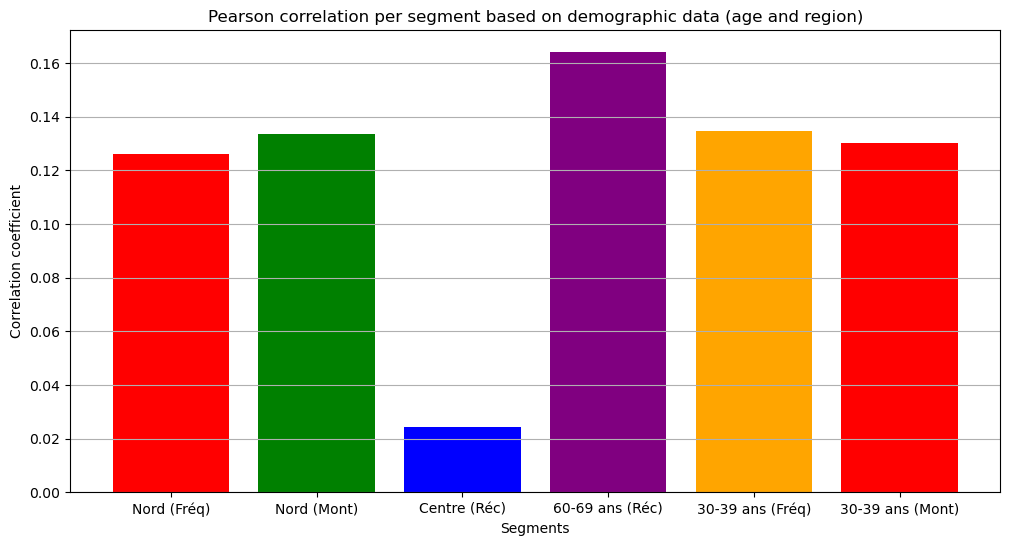

In [17]:
# Exemple de coefficients de corrélation pour chaque segment
segments = ['Nord (Fréq)', 'Nord (Mont)', 'Centre (Réc)', '60-69 ans (Réc)', '30-39 ans (Fréq)', '30-39 ans (Mont)']
correlation_values = [0.125964, 0.133751, 0.024215, 0.164086, 0.13475, 0.13005]

plt.figure(figsize=(12, 6))
plt.bar(segments, correlation_values, color=['red', 'green', 'blue', 'purple', 'orange'])
plt.title('Pearson correlation per segment based on demographic data (age and region)')
plt.xlabel('Segments')
plt.ylabel('Correlation coefficient')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.grid(axis='y')
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Création d'un DataFrame fictif avec des colonnes pour Récence, Fréquence, Montant et Churn
data = {
    'recency': np.random.randint(1, 100, size=1000),  # Récence entre 1 et 100 jours
    'frequency': np.random.randint(1, 20, size=1000),  # Fréquence d'achat entre 1 et 20
    'monetary': np.random.uniform(10, 500, size=1000),  # Montant d'achat entre 10 et 500
    'churn': np.random.choice([0, 1], size=1000)  # 0 = resté, 1 = parti
}

rfm_df = pd.DataFrame(data)

# Affichage des premières lignes du DataFrame pour vérifier
print(rfm_df.head())


   recency  frequency    monetary  churn
0       28         14   83.135454      0
1       68         17  387.243362      0
2       61          6  250.473386      1
3       63          8   79.781093      1
4       78          5  412.194160      1


In [6]:
import statsmodels.api as sm

# Régression Linéaire pour prédire les dépenses
X_linear = rfm_df[['recency', 'frequency']]
y_linear = rfm_df['monetary']
X_linear = sm.add_constant(X_linear)

model_linear = sm.OLS(y_linear, X_linear).fit()
print(model_linear.summary())

# Pour faire des prédictions
new_data_linear = pd.DataFrame({'const': 1, 'recency': [30], 'frequency': [10]})
predictions_linear = model_linear.predict(new_data_linear)
print(predictions_linear)

# Régression Logistique pour prédire le churn
X_logistic = rfm_df[['recency', 'frequency', 'monetary']]
y_logistic = rfm_df['churn']
X_logistic = sm.add_constant(X_logistic)

model_logistic = sm.Logit(y_logistic, X_logistic).fit()
print(model_logistic.summary())

# Pour faire des prédictions sur de nouvelles données
new_data_logistic = pd.DataFrame({'const': 1, 'recency': [30], 'frequency': [10], 'monetary': [200]})
predictions_logistic = model_logistic.predict(new_data_logistic)
print(predictions_logistic)


                            OLS Regression Results                            
Dep. Variable:               monetary   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.311
Date:                Sun, 29 Sep 2024   Prob (F-statistic):              0.270
Time:                        12:34:06   Log-Likelihood:                -6387.4
No. Observations:                1000   AIC:                         1.278e+04
Df Residuals:                     997   BIC:                         1.280e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.4535     12.342     21.670      0.0